# Transformações em uma Imagem
###### por Virgínia Balbo

In [116]:
# imports

import matplotlib.pyplot as plt
import numpy as np
import math as m
import matplotlib.image as img

## 1. Plotando um círculo unitário

<p> A fórmula do círculo é conhecida </p>

$x^{2} + y^{2} = r$

<p> com r sendo o raio. </p>

<p> Como colocar essa fórmula em forma de u vetor? </p>

<p> O melhor jeito é parametrizar. O círculo parametrizado é dado por </p>

<p> $x = r \cdot cos(\theta)$ </p>
<p> $y = r \cdot sin(\theta)$ </p>

<p> Potanto em forma de vetor temos o círculo C representado como </p>

<p> $ C = \begin{bmatrix} r \cdot cos(\theta) \\ r \cdot sin(\theta) \end{bmatrix} $ </p>

<p> O círculo unitário possui raio igual a 1. Portanto pode ser escrito da forma <p/>

<p> $ C_{unitário} = \begin{bmatrix} cos(\theta) \\ sin(\theta) \end{bmatrix} $ </p>

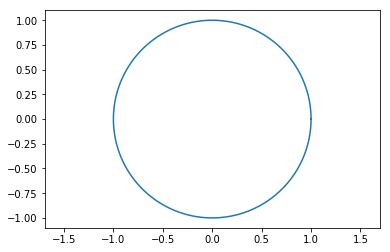

In [120]:
# angulo theta vairando de 0 a 2Pi com intervalos de tamanho igual a 0.001
theta = np.arange(0, 2*m.pi + 0.001, 0.001)

# vetor do circulo unitario
r = 1
C = np.array([r*np.cos(theta),  r*np.sin(theta)])

# plotando o circulo unitario
plt.axis('equal')
plt.plot(C[0], C[1])
plt.show()

## 2. Plotando um quadrado de lado igual a um

<p> Nas próximas atividades vamos aplicar matrizes de rotação. Como visualmente, ao rotacionar um círculo,
    não conseguimos notar diferenças, é mais pertinente que utilizemos um quadrado. Outro motivo é que 
    mais pra frente vamos trabalhar com imagens, e as imagens são retangulares e não circulares. </p>

<p> Para plotarmos um quadrado de lado um basta sabermos seus quatro vértices. Se fixarmos o centro no ponto (0,0),
    nossos vértices serão portanto </p>

<p> ($-\frac{1}{2}$, $-\frac{1}{2}$), </p> 
<p> ($\frac{1}{2}$, $-\frac{1}{2}$), </p>
<p> ($\frac{1}{2}$, $\frac{1}{2}$) e </p>
<p> ($-\frac{1}{2}$, $\frac{1}{2}$). </p>    


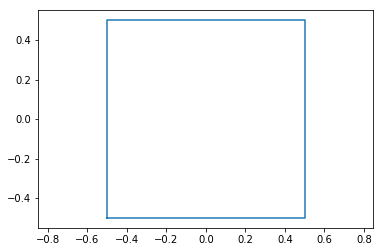

In [125]:
# valores para x's e y's para os vertices do quadrado.
S = np.array([[-.5, .5, .5, -.5, -.5],  [-.5, -.5, .5, .5, -.5]])

# plotando o quadrado de raio 1
plt.axis('equal')
plt.plot(S[0], S[1])
plt.show()

## 3. A matriz de rotação

<p> Transformações lineares podem rotacionar ou esticar um vetor. Vamos começar com a matriz de rotação,
    que é dada por </p>

<p> $ T_{rotação} = \begin{bmatrix} cos(\theta) & sin(\theta) \\ -sin(\theta) & cos(\theta) \end{bmatrix} $ </p>

<p> onde $\theta$ é o ângulo da rotação.</p>

<p> Vamos rotacionar o quadrado em 0°, 10°, 30°, 45°, 60° e 90° (em radianos $\frac{\pi}{18}$, $\frac{\pi}{6}$,
    $\frac{\pi}{4}$, $\frac{\pi}{3}$ e $\frac{\pi}{2}$).</p>

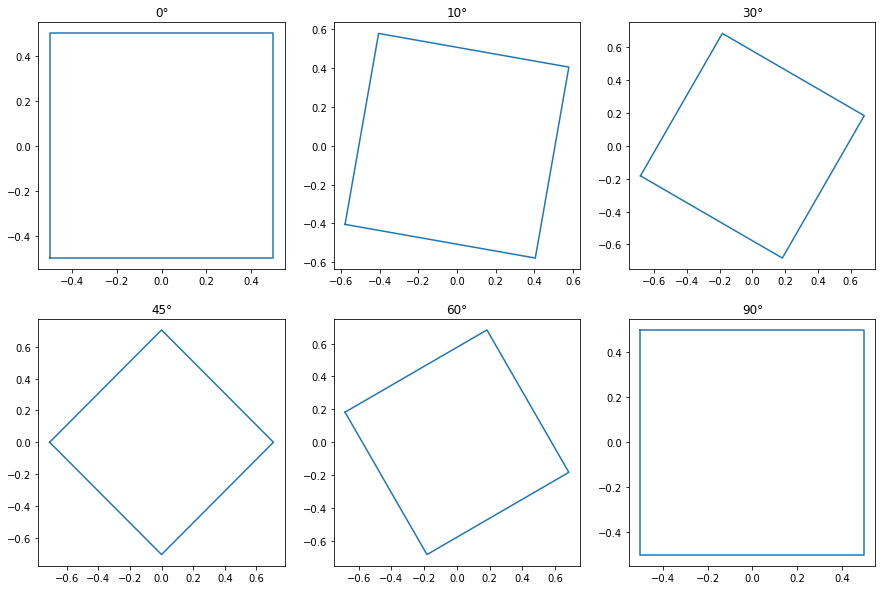

In [129]:
# matrizes de rotação de 10, 30, 45, 60 e 90 graus
T0 = np.array([[m.cos(0), m.sin(0)],  [-m.sin(0), m.cos(0)]])
T10 = np.array([[m.cos(m.pi/18), m.sin(m.pi/18)],  [-m.sin(m.pi/18), m.cos(m.pi/18)]])
T30 = np.array([[m.cos(m.pi/6), m.sin(m.pi/6)],  [-m.sin(m.pi/6), m.cos(m.pi/6)]])
T45 = np.array([[m.cos(m.pi/4), m.sin(m.pi/4)],  [-m.sin(m.pi/4), m.cos(m.pi/4)]])
T60 = np.array([[m.cos(m.pi/3), m.sin(m.pi/3)],  [-m.sin(m.pi/3), m.cos(m.pi/3)]])
T90 = np.array([[m.cos(m.pi/2), m.sin(m.pi/2)],  [-m.sin(m.pi/2), m.cos(m.pi/2)]])

# aplicando as transformações
SxT0 = np.matmul(T0,S)
SxT10 = np.matmul(T10,S)
SxT30 = np.matmul(T30,S)
SxT45 = np.matmul(T45,S)
SxT60 = np.matmul(T60,S)
SxT90 = np.matmul(T90,S)

# plotando os quadrados rotacionados
f, ((plt1, plt2, plt3), (plt4, plt5, plt6)) = plt.subplots(2, 3, figsize=(15,10))

plt1.set_title('0°')
plt1.axis('equal')
plt1.plot(SxT0[0], SxT0[1])

plt2.set_title('10°')
plt2.axis('equal')
plt2.plot(SxT10[0], SxT10[1])

plt3.set_title('30°')
plt3.axis('equal')
plt3.plot(SxT30[0], SxT30[1])

plt4.set_title('45°')
plt4.axis('equal')
plt4.plot(SxT45[0], SxT45[1])

plt5.set_title('60°')
plt5.axis('equal')
plt5.plot(SxT60[0], SxT60[1])

plt6.set_title('90°')
plt6.axis('equal')
plt6.plot(SxT90[0], SxT90[1])

plt.show()


<p> **Obs.:** Podemos verificar que a matriz de rotação para 0° é a matriz identidade, o que faz sentido 
    já que a rotação de 0° não deve alterar o quadrado. </p>

## 3. A matriz de esticamento

<p> A matriz de esticamento é dada por </p>

<p> $ T_{esticamento} = \begin{bmatrix} A & 0 \\ 0 & B \end{bmatrix} $ </p>

<p> onde A é o esticamento no eixo x e b é o esticamento no eixo y. </p>

<p> Vamos esticar o quadrado em 1 vez em cada eixo, 2 vezes apenas no eixo x, 2 vezes apenas no eixo y e por último duas vezes nos dois eixos. Ou seja, obteremos (x,y), (2x,y), (x,2y) e (2x,2y). </p>

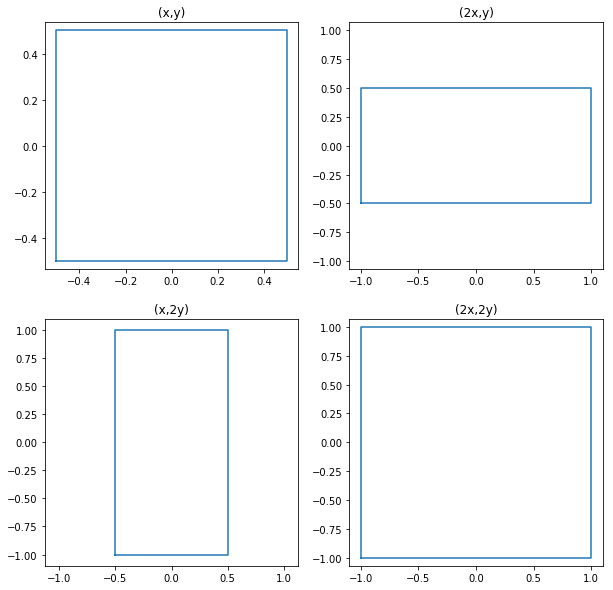

In [132]:
# matrizes de esticamento de uma vez em cada eixo, duas vezes apenas no eixo x, 
# duas vezes apenas no eixo y e duas vezes em cada eixo
TXY = np.array([[1, 0],  [0, 1]])
T2XY = np.array([[2, 0],  [0, 1]])
TX2Y = np.array([[1, 0],  [0, 2]])
T2X2Y = np.array([[2, 0],  [0, 2]])

# aplicando as transformações
SxTXY = np.matmul(TXY,S)
SxT2XY = np.matmul(T2XY,S)
SxTX2Y = np.matmul(TX2Y,S)
SxT2X2Y = np.matmul(T2X2Y,S)

# plotando os quadrados esticados
f, ((plt1, plt2), (plt3, plt4)) = plt.subplots(2, 2, figsize=(10,10))

plt1.set_title('(x,y)')
plt1.axis('equal')
plt1.plot(SxTXY[0], SxTXY[1])

plt2.set_title('(2x,y)')
plt2.axis('equal')
plt2.plot(SxT2XY[0], SxT2XY[1])

plt3.set_title('(x,2y)')
plt3.axis('equal')
plt3.plot(SxTX2Y[0], SxTX2Y[1])

plt4.set_title('(2x,2y)')
plt4.axis('equal')
plt4.plot(SxT2X2Y[0], SxT2X2Y[1])

plt.show()


<p> **Obs.:** Podemos verificar que a matriz de esticamento em uma vez em cada eixo é a matriz identidade,
    o que faz sentido já que o esticamento em uma vez em cada eixo não deve alterar o quadrado. </p>